# Tarea realizada por Jesús Martínez Leal
Última edición: 13/02/2024

# LDA vs PCA

In [165]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.preprocessing import StandardScaler
import scipy
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [166]:
# n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

dim = len(X[0])
n_classes = len(np.unique(y))

### Normalizar los datos

In [167]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train)
X_te = scaler.transform(X_test)

# No hay que estandarizar las y porque son las etiquetas de las clases, que ademas son el dígito que representan.

### Reducción de la dimensionalidad 

#### PCA

In [168]:
# Apply PCA 

pca = PCA(n_components=20, random_state = random_state)
X_tr_pca = pca.fit_transform(X_tr)
X_te_pca = pca.transform(X_te) # transformamos usando lo fiteado en el training

Text(0.5, 1.0, 'PCA')

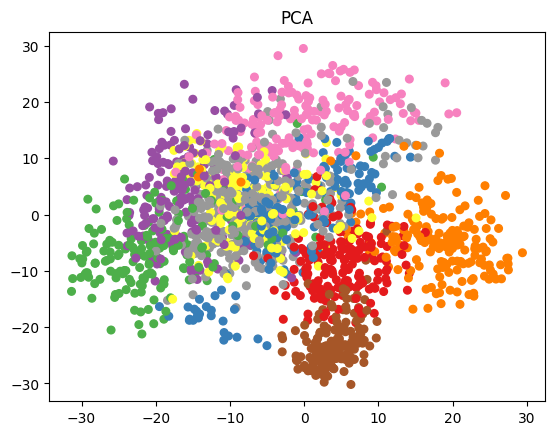

In [169]:
X_embedded_pca = pca.transform(X)

# Hacemos un plot con las dos primeras componentes principales, coloreando por la clase

plt.scatter(X_embedded_pca[:, 0], X_embedded_pca[:, 1], c = y, s = 30, cmap = "Set1") # como color las etiquetas supervisadas

plt.title("PCA")

#### LDA

In [170]:
# Apply LDA

lda = LinearDiscriminantAnalysis()

X_tr_lda = lda.fit_transform(X_tr, y_train)
X_te_lda = lda.transform(X_te)

Text(0.5, 1.0, 'LDA')

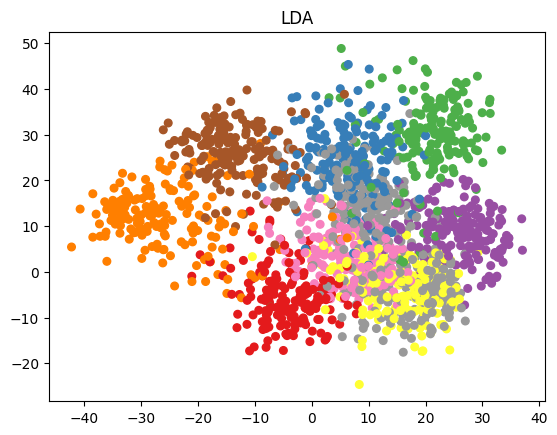

In [171]:
# Haz una representación de las dos primeras componentes del dataset transformado a LDA

X_embedded_lda = lda.transform(X)


plt.scatter(X_embedded_lda[:, 0], X_embedded_lda[:, 1], c=y, s=30, cmap="Set1")
plt.title("LDA")

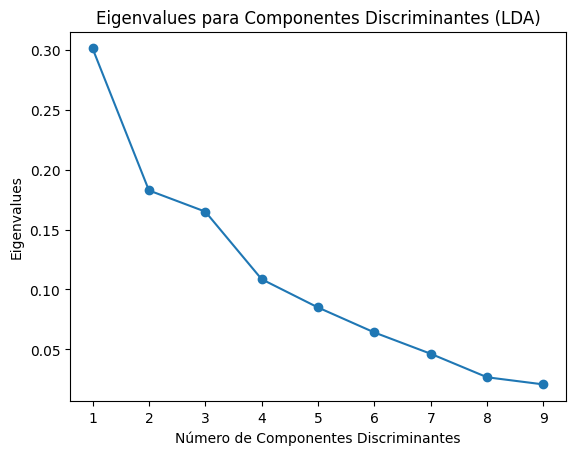

In [172]:
lda = LinearDiscriminantAnalysis()

X_tr_lda = lda.fit_transform(X_tr, y_train)

# Obtener los eigenvalues
eigenvalues = lda.explained_variance_ratio_

# Graficar los eigenvalues
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Número de Componentes Discriminantes')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues para Componentes Discriminantes (LDA)')
plt.show()

## A partir de la representación de X aplicando cada método de reducción de dimensionalidad, ¿cuál crees que será más efectivo?

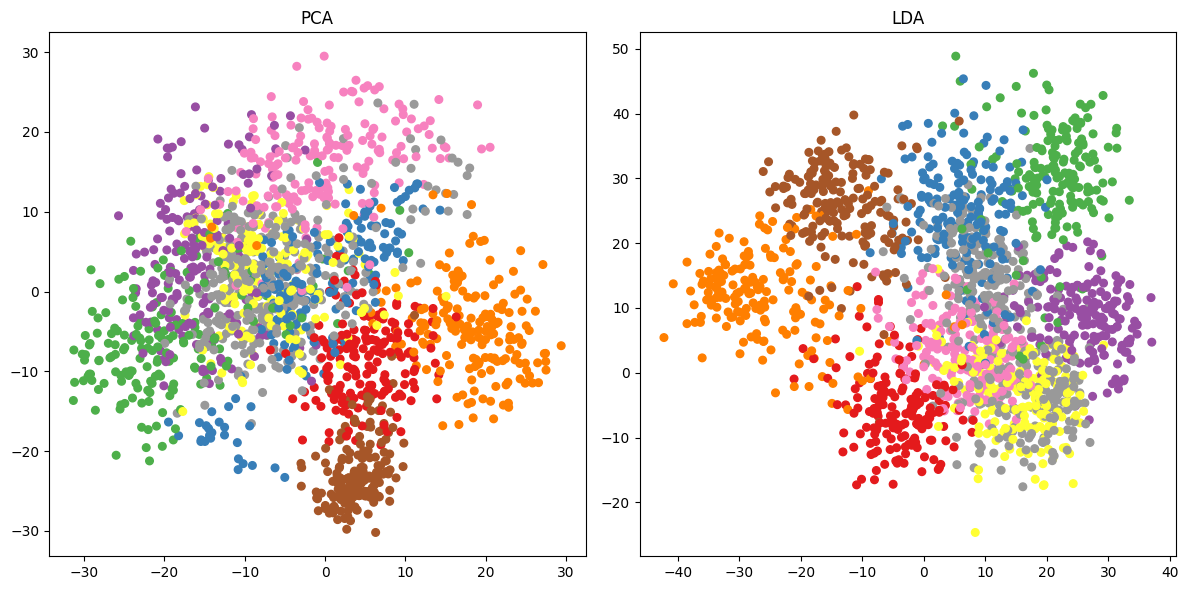

In [173]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(X_embedded_pca[:, 0], X_embedded_pca[:, 1], c=y, s=30, cmap="Set1")
plt.title("PCA")


plt.subplot(1, 2, 2)
plt.scatter(X_embedded_lda[:, 0], X_embedded_lda[:, 1], c=y, s=30, cmap="Set1")
plt.title("LDA")


plt.tight_layout()


plt.show()

Por un lado, PCA es un método no supervisado, lo que significa que no toma en cuenta las etiquetas de clase. Es útil cuando queremos reducir la dimensionalidad de los datos manteniendo la mayor cantidad de información posible (maximización de la varianza en los datos).

Por otro lado, LDA es un método supervisado, lo que significa que toma en cuenta las etiquetas de clase. LDA busca maximizar la separabilidad entre las clases. 

Porque estamos clasificando y tenemos los datos etiquetados, es probable que LDA sea una mejor opción.

### Representar la varianza explicada de los dos métodos

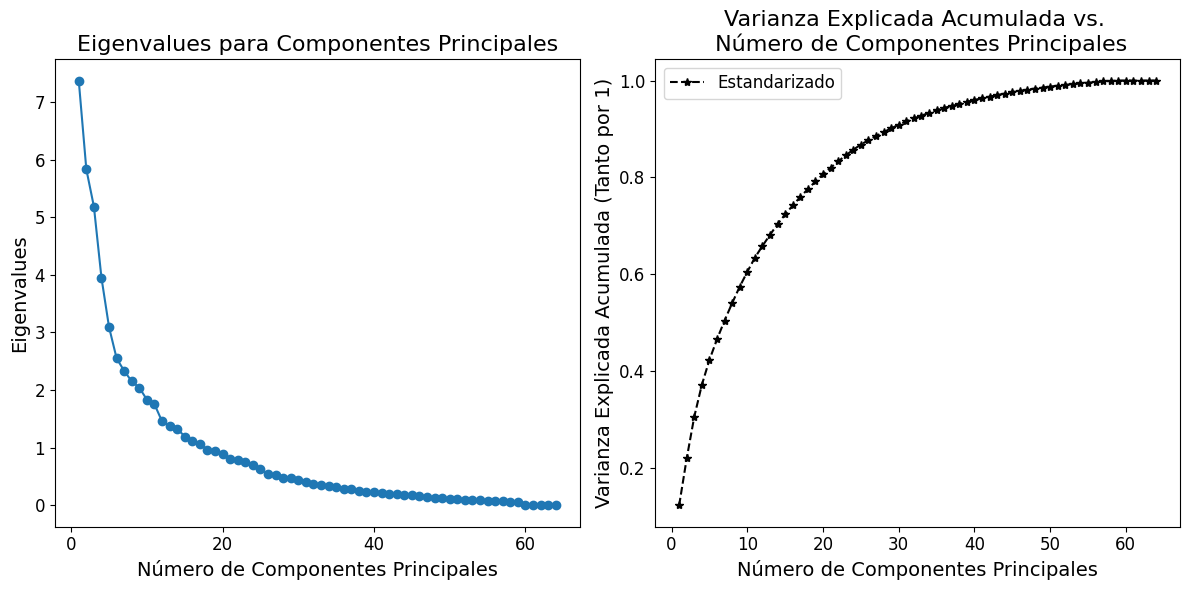

In [174]:
# Ajustar PCA a los datos
pca = PCA()
pca.fit(X_tr)

# Obtener los eigenvalues
eigenvalues = pca.explained_variance_

# Obtener la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
num_components = np.arange(1, len(cumulative_variance_explained) + 1)

# Crear la figura y los subplots en una sola fila
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Gráfico de eigenvalues
axs[0].plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
axs[0].set_xlabel('Número de Componentes Principales', fontsize=14)
axs[0].set_ylabel('Eigenvalues', fontsize=14)
axs[0].set_title('Eigenvalues para Componentes Principales', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)  # Ajustar el tamaño de los ticks
axs[0].set_xticks(np.arange(0, len(eigenvalues) + 1, 20))  # Establecer ticks de x de 5 en 5

# Subplot 2: Gráfico de varianza explicada acumulada
axs[1].plot(num_components, cumulative_variance_explained, linestyle='--', marker='*', color='black', label='Estandarizado')
axs[1].set_xlabel('Número de Componentes Principales', fontsize=14)
axs[1].set_ylabel('Varianza Explicada Acumulada (Tanto por 1)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].set_title('Varianza Explicada Acumulada vs. \n Número de Componentes Principales', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)  # Ajustar el tamaño de los ticks
axs[1].set_xticks(np.arange(0, len(eigenvalues) + 1, 10))  # Establecer ticks de x de 10 en 10

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el plot
plt.show()

Vemos que con un número de 30 componentes principales tendríamos alrededor de un 90% de la varianza explicada en nuestros datos.

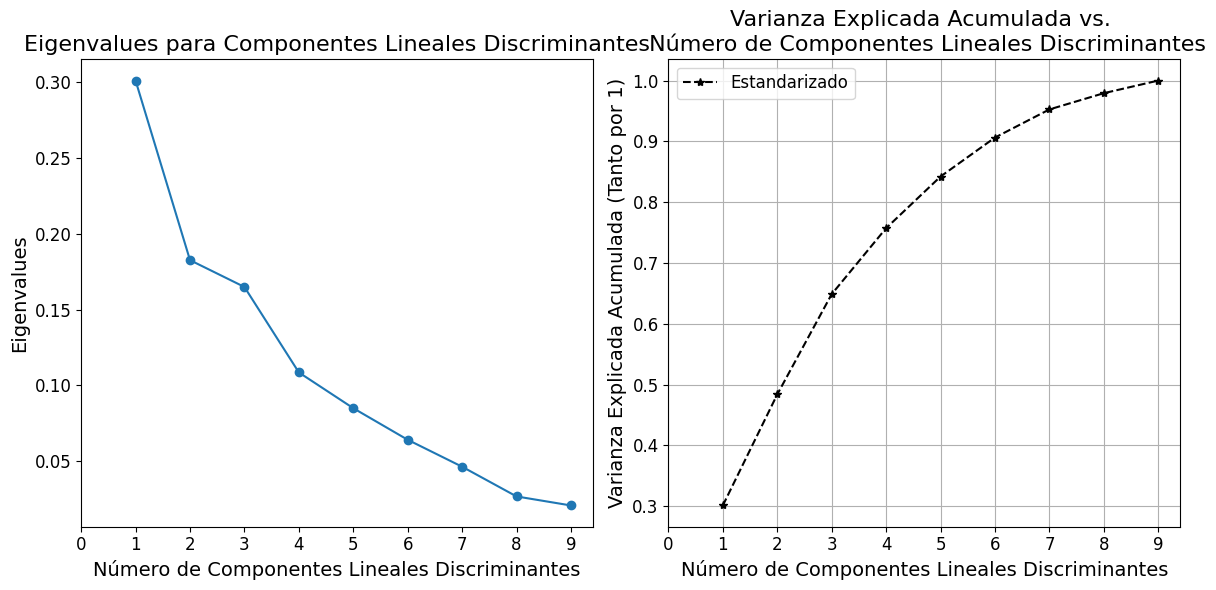

In [175]:
# Ajustar LDA a los datos
lda = LinearDiscriminantAnalysis()
lda.fit(X_tr, y_train)

# Obtener los eigenvalues (valores propios)
eigenvalues = lda.explained_variance_ratio_

# Obtener la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(eigenvalues)
num_components = np.arange(1, len(cumulative_variance_explained) + 1)

# Crear la figura y los subplots en una sola fila
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Gráfico de eigenvalues
axs[0].plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
axs[0].set_xlabel('Número de Componentes Lineales Discriminantes', fontsize=14)
axs[0].set_ylabel('Eigenvalues', fontsize=14)
axs[0].set_title('Eigenvalues para Componentes Lineales Discriminantes', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)  # Ajustar el tamaño de los ticks
axs[0].set_xticks(np.arange(0, len(eigenvalues) + 1, 1))  # Establecer ticks de x de 1 en 1

# Subplot 2: Gráfico de varianza explicada acumulada
axs[1].plot(num_components, cumulative_variance_explained, linestyle='--', marker='*', color='black', label='Estandarizado')
axs[1].set_xlabel('Número de Componentes Lineales Discriminantes', fontsize=14)
axs[1].set_ylabel('Varianza Explicada Acumulada (Tanto por 1)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].set_title('Varianza Explicada Acumulada vs. \n Número de Componentes Lineales Discriminantes', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)  # Ajustar el tamaño de los ticks
axs[1].set_xticks(np.arange(0, len(eigenvalues) + 1, 1))  # Establecer ticks de x de 1 en 1
axs[1].grid(True)

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el plot
plt.show()

### Clasificador - Support Vector Classifier

Para el clasificador he seleccionado el Support Vector Classifier.

Cargamos los modelos de PCA y LDA nuevamente con el número de componentes deseados.

In [176]:
pca = PCA(n_components=5, random_state = random_state)
X_tr_pca = pca.fit_transform(X_tr)
X_te_pca = pca.transform(X_te) # transformamos usando lo fiteado en el training

In [177]:
lda = LinearDiscriminantAnalysis(n_components = 6)
X_tr_lda = lda.fit_transform(X_tr, y_train)
X_te_lda = lda.transform(X_te)

In [178]:
# SVC (Support Vector Classifier) con todas las características

sigma_mean = np.mean(scipy.spatial.distance.pdist(X_tr)) # media de distancias pair-wise entre pares de puntos

gamma_mean = 1/2/sigma_mean**2
param_grid = [{
    'C': [101, 102],
    'gamma': np.logspace(np.log10(gamma_mean*0.1), np.log10(gamma_mean*10), 20),
    'kernel': ['rbf','linear']
}]

svc_model = GridSearchCV(SVC(probability = True), param_grid = param_grid, cv = 3, verbose = 1, n_jobs = 2)
# verbose controla info que se imprime durante ajuste del modelo; en = 1 se detalla. n_jobs indica hilos de ejecución que se utilizarán.

# fit model
svc_model.fit(X_tr, y_train)
print(svc_model.best_score_)
print(svc_model.best_params_)

y_preds_svc = svc_model.predict(X_te)
report = classification_report(y_test, y_preds_svc)
print(report)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
0.9743947858472998
{'C': 101, 'gamma': 0.001997661454764545, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       0.96      0.99      0.97        91
           2       0.92      1.00      0.96        88
           3       0.98      0.97      0.97        92
           4       1.00      0.96      0.98        91
           5       0.98      0.97      0.97        91
           6       0.99      0.96      0.97        91
           7       0.98      1.00      0.99        89
           8       1.00      0.94      0.97        87
           9       0.96      0.94      0.95        90

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [179]:
# SVC with PCA

sigma_mean = np.mean(scipy.spatial.distance.pdist(X_tr_pca))
gamma_mean = 1/2/sigma_mean**2
param_grid = [{
    'C': [101, 102],
    'gamma': np.logspace(np.log10(gamma_mean*0.1), np.log10(gamma_mean*10), 20),
    'kernel': ['rbf','linear']
}]

svc_model = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=3, verbose=1, n_jobs=2)

# fit model
svc_model.fit(X_tr_pca, y_train)
print(svc_model.best_score_)
print(svc_model.best_params_)

y_preds_pca_svc = svc_model.predict(X_te_pca)
report=classification_report(y_test, y_preds_pca_svc)
print(report)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
0.9020049658597145
{'C': 101, 'gamma': 0.0127456857532298, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        89
           1       0.88      0.91      0.90        91
           2       0.89      0.85      0.87        88
           3       0.86      0.76      0.81        92
           4       0.98      0.96      0.97        91
           5       0.92      0.85      0.88        91
           6       1.00      0.91      0.95        91
           7       0.94      0.90      0.92        89
           8       0.69      0.77      0.73        87
           9       0.72      0.83      0.77        90

    accuracy                           0.87       899
   macro avg       0.88      0.87      0.88       899
weighted avg       0.88      0.87      0.88       899



In [188]:
# SVC with LDA

sigma_mean = np.mean(scipy.spatial.distance.pdist(X_tr_lda))
gamma_mean = 1/2/sigma_mean**2
param_grid = [{
    'C': [101, 102],
    'gamma': np.logspace(np.log10(gamma_mean*0.1), np.log10(gamma_mean*10), 20),
    'kernel': ['rbf','linear']
}]

svc_model = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=3, verbose=1, n_jobs=2)

# fit model
svc_model.fit(X_tr_lda, y_train)
print(svc_model.best_score_)
print(svc_model.best_params_)

y_preds_lda_svc = svc_model.predict(X_te_lda)
report=classification_report(y_test, y_preds_lda_svc)
print(report)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
0.9465440356744704
{'C': 101, 'gamma': 0.0010963247993581778, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.84      0.90      0.87        91
           2       0.98      0.98      0.98        88
           3       0.90      0.90      0.90        92
           4       0.98      0.92      0.95        91
           5       1.00      0.92      0.96        91
           6       0.99      0.92      0.95        91
           7       0.94      1.00      0.97        89
           8       0.82      0.86      0.84        87
           9       0.90      0.88      0.89        90

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



### Accuracy con PCA y LDA

In [181]:
acc_svc_pca = accuracy_score(y_test, y_preds_pca_svc)
acc_svc_lda = accuracy_score(y_test, y_preds_lda_svc)
acc_svc = accuracy_score(y_test, y_preds_svc)


print("Classification Accuracy (Bruto):", round(acc_svc*100,1), "%")
print("Classification Accuracy (PCA):  ", round(acc_svc_pca*100,1), "%")
print("Classification Accuracy (LDA):  ", round(acc_svc_lda*100,1), "%")

Classification Accuracy (Bruto): 97.2 %
Classification Accuracy (PCA):   87.4 %
Classification Accuracy (LDA):   92.4 %


Comprobamos como LDA nos permite clasificar mejor, aunque el resultado de PCA no es malo pese a ser un método no supervisado. No obstante para este conjunto de datos tan pequeño, la ganancia en tiempo no es significativa y con los datos brutos obtenemos una precision bastante mejor casi sin coste tiempo-recursos

## Clasificador - KNeighborsClassifier

In [182]:
n_neighbors = 3

knn_bruto = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_bruto.fit(X_tr, y_train)
y_preds_knn = knn_bruto.predict(X_te)

knn_pca = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_pca.fit(X_tr_pca, y_train)
y_preds_pca_knn = knn_pca.predict(X_te_pca)

knn_lda = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_lda.fit(X_tr_lda, y_train)
y_preds_lda_knn = knn_lda.predict(X_te_lda)

### Accuracy con PCA y LDA

In [183]:
acc_knn_pca = accuracy_score(y_test, y_preds_pca_knn)
acc_knn_lda = accuracy_score(y_test, y_preds_lda_knn)
acc_knn = accuracy_score(y_test, y_preds_knn)


print("Classification Accuracy (Bruto):", round(acc_knn*100,1), "%")
print("Classification Accuracy (PCA):  ", round(acc_knn_pca*100,1), "%")
print("Classification Accuracy (LDA):  ", round(acc_knn_lda*100,1), "%")

Classification Accuracy (Bruto): 97.0 %
Classification Accuracy (PCA):   85.1 %
Classification Accuracy (LDA):   93.1 %


## Clasificador - RandomForestClassifier

In [184]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest con todas las características
rf_model = RandomForestClassifier(random_state=random_state, n_jobs=2)

param_grid = {
    'n_estimators': [50, 150],
    'max_depth': [None, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

rf_grid = GridSearchCV(rf_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=2)
rf_grid.fit(X_tr, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

y_preds_rf = rf_grid.predict(X_te)
report_rf = classification_report(y_test, y_preds_rf)
print(report_rf)

# RandomForest con PCA
rf_model_pca = RandomForestClassifier(random_state=random_state, n_jobs=2)

rf_grid_pca = GridSearchCV(rf_model_pca, param_grid=param_grid, cv=3, verbose=1, n_jobs=2)
rf_grid_pca.fit(X_tr_pca, y_train)

print(rf_grid_pca.best_score_)
print(rf_grid_pca.best_params_)

y_preds_rf_pca = rf_grid_pca.predict(X_te_pca)
report_rf_pca = classification_report(y_test, y_preds_rf_pca)
print(report_rf_pca)

# RandomForest con LDA
rf_model_lda = RandomForestClassifier(random_state=random_state, n_jobs=2)

rf_grid_lda = GridSearchCV(rf_model_lda, param_grid=param_grid, cv=3, verbose=1, n_jobs=2)
rf_grid_lda.fit(X_tr_lda, y_train)

print(rf_grid_lda.best_score_)
print(rf_grid_lda.best_params_)

y_preds_rf_lda = rf_grid_lda.predict(X_te_lda)
report_rf_lda = classification_report(y_test, y_preds_rf_lda)
print(report_rf_lda)

# Accuracy
acc_rf = accuracy_score(y_test, y_preds_rf)
acc_rf_pca = accuracy_score(y_test, y_preds_rf_pca)
acc_rf_lda = accuracy_score(y_test, y_preds_rf_lda)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.9665859714463068
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        88
           3       0.99      0.96      0.97        92
           4       0.98      0.97      0.97        91
           5       0.98      0.96      0.97        91
           6       0.99      0.97      0.98        91
           7       0.97      1.00      0.98        89
           8       0.96      0.94      0.95        87
           9       0.95      0.98      0.96        90

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.8630540037

### Accuracy con PCA y LDA

In [185]:
acc_rf = accuracy_score(y_test, y_preds_rf)
acc_rf_pca = accuracy_score(y_test, y_preds_rf_pca)
acc_rf_lda = accuracy_score(y_test, y_preds_rf_lda)

In [186]:
print("Classification Accuracy (Bruto):", round(acc_rf*100,1), "%")
print("Classification Accuracy (PCA):  ", round(acc_rf_pca*100,1), "%")
print("Classification Accuracy (LDA):  ", round(acc_rf_lda*100,1), "%")

Classification Accuracy (Bruto): 97.3 %
Classification Accuracy (PCA):   85.5 %
Classification Accuracy (LDA):   92.1 %


## Accuracy obtenidas con los diferentes métodos (resumen)

In [187]:
import pandas as pd

# Redondear las precisiones a 2 decimales y multiplicar por 100
acc_svc_perc = round(acc_svc, 3) * 100
acc_svc_pca_perc = round(acc_svc_pca, 3) * 100
acc_svc_lda_perc = round(acc_svc_lda, 3) * 100

acc_knn_perc = round(acc_knn, 3) * 100
acc_knn_pca_perc = round(acc_knn_pca, 3) * 100
acc_knn_lda_perc = round(acc_knn_lda, 3) * 100

acc_rf_perc = round(acc_rf, 3) * 100
acc_rf_pca_perc = round(acc_rf_pca, 3) * 100
acc_rf_lda_perc = round(acc_rf_lda, 3) * 100

# Datos de precisión
data = {
    'SVC (%)': [acc_svc_perc, acc_svc_pca_perc, acc_svc_lda_perc],
    'KNN (%)': [acc_knn_perc, acc_knn_pca_perc, acc_knn_lda_perc],
    'RF (%)': [acc_rf_perc, acc_rf_pca_perc, acc_rf_lda_perc]
}

# Índices de las filas
index = ['Bruto', 'PCA', 'LDA']

# Crear DataFrame
df = pd.DataFrame(data, index=index)

# Aplicar formato a las columnas para mostrar solo 2 decimales
df_styled = df.style.format({'SVC (%)': '{:.2f}%', 'KNN (%)': '{:.2f}%', 'RF (%)': '{:.2f}%'})

# Estilizar el DataFrame para una visualización más atractiva
styled_df = df_styled.set_properties(**{'text-align': 'center'}) \
                     .set_caption('Comparativa de Precisión por Método y Técnica') \
                     .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), ('color', 'red')]}])

# Mostrar DataFrame estilizado
styled_df


,SVC (%),KNN (%),RF (%)
Bruto,97.20%,97.00%,97.30%
PCA,87.40%,85.10%,85.50%
LDA,92.40%,93.10%,92.10%


## Variación de la accuracy con el número de componentes de PCA y LDA (caso de KNN)

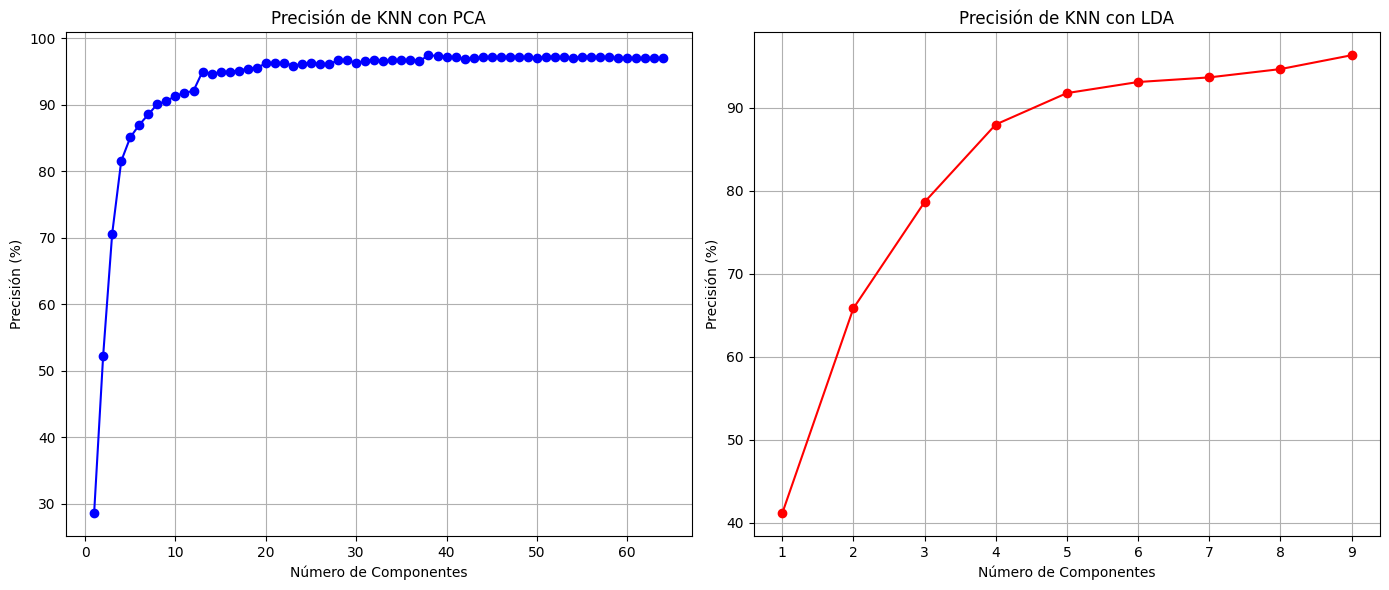

In [192]:
# Definir el rango de número de componentes para PCA y LDA
n_components_pca = list(range(1, 65))
n_components_lda = list(range(1, 10))

# Listas para almacenar la precisión de PCA y LDA
accuracy_pca = []
accuracy_lda = []

# Bucle para calcular la precisión para diferentes números de componentes
for n in n_components_pca:
    pca = PCA(n_components=n, random_state=random_state)
    X_tr_pca = pca.fit_transform(X_tr)
    X_te_pca = pca.transform(X_te)
    knn_pca.fit(X_tr_pca, y_train)
    y_preds_pca_knn = knn_pca.predict(X_te_pca)
    accuracy_pca.append(accuracy_score(y_test, y_preds_pca_knn) * 100)

for n in n_components_lda:
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_tr_lda = lda.fit_transform(X_tr, y_train)
    X_te_lda = lda.transform(X_te)
    knn_lda.fit(X_tr_lda, y_train)
    y_preds_lda_knn = knn_lda.predict(X_te_lda)
    accuracy_lda.append(accuracy_score(y_test, y_preds_lda_knn) * 100)

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para PCA
axes[0].plot(n_components_pca, accuracy_pca, marker='o', linestyle='-', color='b')
axes[0].set_title('Precisión de KNN con PCA')
axes[0].set_xlabel('Número de Componentes')
axes[0].set_ylabel('Precisión (%)')
axes[0].grid(True)

# Gráfico para LDA
axes[1].plot(n_components_lda, accuracy_lda, marker='o', linestyle='-', color='r')
axes[1].set_title('Precisión de KNN con LDA')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Precisión (%)')
axes[1].grid(True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()